<a href="https://colab.research.google.com/github/pkwon35/Smart_Factory_APS_System/blob/main/%EC%83%81%ED%92%88%EB%B3%84_GRU_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 한가지 제품 우선 검증

In [ ]:
org_df = pd.read_csv('/content/drive/MyDrive/5조_스마트팩토리/진유훈/증식완료(orderquant포함).csv',index_col=0)
temp_data = pd.read_pickle('/content/drive/MyDrive/5조_스마트팩토리/진유훈/temp18_21.pkl')

In [ ]:
org_df

,일자,sold_quant,prediction,prod_name
0,2018-10-01,24080.0,32192.8800,CSA5000
0,2018-10-01,5680.0,4650.4556,PEMA-SR3000F
0,2018-10-01,29870.0,69546.9900,PEMA-HR1000
0,2018-10-01,10260.0,10650.5625,PEMA-SR2000
0,2018-10-01,14610.0,37532.6050,PEMA-HR1500
...,...,...,...,...
239,2021-04-24,45000.0,21063.3850,PEMA-SR2000
145,2021-04-24,1000.0,9766.3890,AE
116,2021-04-24,20000.0,6936.5425,PEMA-SN400
12,2021-04-24,10000.0,9502.2660,PEMA-HR1000F


In [ ]:
org_df = org_df.reset_index(drop=True)
org_df['일자'] = pd.to_datetime(org_df['일자'])
org_df = org_df[org_df['일자']>'2018-10-02']
# org_df = org_df[['sold_quant','prediction']]
# org_df

In [ ]:
원자재최종3 = pd.read_pickle('/content/drive/MyDrive/5조_스마트팩토리/진유훈/원자재정리.pkl')
원자재최종3['prod_name'].unique()

array(['PEMA-580FX', 'PEMA-SR2000', 'PEMA-HR1000', 'ARE-580FX',
       'PEMA-PR1000', 'PEMA-HR1500', 'AE', 'PEMA-SR3000F', 'CSA5000',
       'PEMA-SR2000A', 'PEMA-SN400', 'CSA4000', 'PEMA-CR1000',
       'PEMA-500FR', 'PEMA-CSA5000', 'PEMA-PCM2000', 'PEMA-PCM2000B',
       'PEMA-PR2000', 'SRE-110', 'PEMA-PR10001', 'CSA5000F',
       'PEMA-PCR3000E', 'PR1000', 'PEMA-SR5000F', 'PEMA-PCR3000N',
       'PEMA-SP1000', 'PEMA-HR1000F', 'SRE-200', 'PEMA-HR1000OPC',
       'PEMA-SPR', 'PEMA-HR1500F', 'PEMA-HR1000S'], dtype=object)

In [ ]:
## 온도데이터 merge

data = pd.merge(prod0_df, temp_data, on='일자')[['일자','sold_quant','기온','습도',]]
data = data.set_index('일자')
data = data.sort_values('일자')
data

,sold_quant,기온,습도
일자,,,
2018-10-03,34600.0,16.000000,75.400002
2018-10-04,21440.0,19.100000,70.800003
2018-10-05,71870.0,17.799999,97.099998
2018-10-06,32880.0,17.900000,94.000000
2018-10-07,67930.0,17.200001,77.099998
...,...,...,...
2021-04-19,32000.0,13.500000,58.299999
2021-04-21,47000.0,19.600000,43.500000
2021-04-22,75000.0,21.799999,35.400002


In [ ]:
# 모델 input data  학습 dates 정의

train_dates = data.index
train_dates

DatetimeIndex(['2018-10-03', '2018-10-04', '2018-10-05', '2018-10-06',
               '2018-10-07', '2018-10-10', '2018-10-11', '2018-10-12',
               '2018-10-13', '2018-10-14',
               ...
               '2021-04-14', '2021-04-15', '2021-04-16', '2021-04-17',
               '2021-04-18', '2021-04-19', '2021-04-21', '2021-04-22',
               '2021-04-23', '2021-04-24'],
              dtype='datetime64[ns]', name='일자', length=752, freq=None)

In [ ]:
df_for_training = data

In [ ]:
# 컬럼명
cols = list(data.columns)
cols

['sold_quant', '기온', '습도']

In [ ]:
df_for_training = data
cols = list(data.columns)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['sold_quant', '기온', '습도']
# 스케일 후 columns
df_for_training_scaled = scaler.fit_transform(df_for_training)
df_for_training_scaled

array([[0.35566411, 0.6674208 , 0.65445864],
       [0.20260526, 0.73755656, 0.58121026],
       [0.78913701, 0.70814477, 1.        ],
       ...,
       [0.82554082, 0.7986425 , 0.01751596],
       [0.48825308, 0.7352941 , 0.00955418],
       [0.95347755, 0.71040722, 0.07961784]])

In [ ]:
# range(n_past , len(df_for_training_scaled) - n_future+1)

In [ ]:
# 과거 n_past 일의 데이터로 n_future 만큼의 미래 데이터 예측 

n_future = 3 # 예측할 일수 many_to_one =>
n_past = 30


trainX = []
trainY = []
for i in range(n_past, len(df_for_training_scaled) - n_future+1): # ex)    3 ~ ( len(데이터) - 30-1 )
    trainX.append(df_for_training_scaled[ i-n_past:i, 0:df_for_training.shape[1]]) # [-2:3] , 0:len(데이터)
    trainY.append(df_for_training_scaled[ i+n_future-1:i+n_future, 0]) # [3:4,0]

trainX,trainY = np.array(trainX), np.array(trainY)

print(trainX.shape) # 720개의 row(기간), 예측을 위한 이전 데이터 30개 & 30일(편의상 일로 부름) 이후 3일의 데이터
print(trainY.shape) # 총 길이와 실제 값

(720, 30, 3)
(720, 1)


In [ ]:
trainX.shape

(720, 30, 3)

In [ ]:
# 딥러닝 GRU 모델

BATCH_SIZE = 32
time_steps = n_past
unit = 128

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, GRU
from tensorflow.keras.losses import Huber
# from keras.optimizers import SGD
from keras.layers import Dropout
    
# The GRU architecture
my_GRU_model = Sequential()
# First GRU layer with Dropout regularisation
my_GRU_model.add(GRU(units=unit, return_sequences=True, activation='tanh'))
my_GRU_model.add(Dropout(0.2))
# Second GRU layer
my_GRU_model.add(GRU(units=unit, return_sequences=True, activation='tanh'))
my_GRU_model.add(Dropout(0.2))
    
# Third GRU layer
my_GRU_model.add(GRU(units=unit, return_sequences=True, activation='tanh'))
my_GRU_model.add(Dropout(0.2))
# Fourth GRU layer
my_GRU_model.add(GRU(units=unit, activation='tanh'))
# my_GRU_model.add(Dropout(0.2))
# The output layer
my_GRU_model.add(Dense(units=1))
# Compiling the RNN
my_GRU_model.compile(optimizer='adam',loss=Huber(), metrics = ['mse'])
# Fitting to the training set
history = my_GRU_model.fit(trainX,trainY,epochs=100,validation_split=0.2, batch_size=BATCH_SIZE,verbose=0)

# from keras.models import load_model
# my_GRU_model = load_model(f'/content/drive/MyDrive/5조_스마트팩토리/권준기/진유훈_모델_save/CSA5000.h5')


# plt.plot(history.history['loss'], label='Training loss')
# plt.plot(history.history['val_loss'], label = 'Validation loss')
# plt.legend()

In [ ]:
print(n_past)

30


In [ ]:
# 예측기간 + 그 기간에 대한 periods
# freq 조정해서 6개월에 대한 날짜 맞춰야함
n_future = 180
forecast_period_dates = pd.date_range('2021-04-24', periods=n_future, freq='1d').tolist()

In [ ]:
# 이것은 시작일 list[-1]
list(train_dates)[-1]

In [ ]:
## 예측 predict

forecast = my_GRU_model.predict(trainX[-n_future:])
forecast_copies = np.repeat(forecast, df_for_training.shape[1],axis=-1) # np.repeat(a, n) a를 n개 복사, axis=-1 현재 배열의 마지막 axis
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]

In [ ]:
trainX[-n_future:].shape

(180, 30, 3)

In [ ]:
len_forecast = len(forecast[:,-1])#n_future 만큼의 길이 
forecast_dates = pd.date_range(forecast_period_dates[1], periods=len_forecast, freq = str(int(n_future/len_forecast))+'d').tolist() # 데이터가 완전형으로 들어가는게 아니기 때문에     freq = [ 예측할 일수 / 데이터셋의일수 ] => 예측 시작일부터 180일까지의 간격
# forecast_dates

In [ ]:
# 예측 dataframe 만들어주기
forecast_dates = []
for time_i in forecast_period_dates:
  forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'일자':np.array(pd.date_range(forecast_period_dates[1], periods=len_forecast, freq = str(int(n_future/len_forecast))+'d').tolist()), 'sold_quant':y_pred_future})
df_forecast['일자']=pd.to_datetime(df_forecast['일자'])


In [ ]:
len_forecast = len(forecast[:,-1])
forecast_dates = pd.date_range(forecast_dates[1], periods=n_future, freq = str(int(n_future/len_forecast))+'d').tolist()

<Figure size 720x432 with 0 Axes>

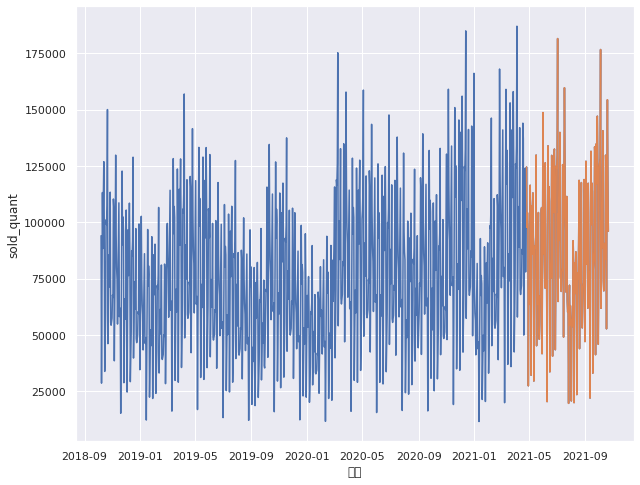

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

original = prod0_df[['일자','sold_quant']]
original['일자'] = pd.to_datetime(prod0_df['일자'])
original = original.loc[original['일자'] >= '2021']
fig = plt.figure(figsize=(10,6))
sns.set()
# sns.lineplot(prod0_df['일자'], prod0_df['sold_quant'])
# sns.lineplot(df_forecast['일자'], df_forecast['sold_quant'])

con_data = pd.concat([prod0_df,df_forecast])[['일자','sold_quant']] # 전체기간~예측기간 까지의 데이터
con_data.reset_index(inplace=True, drop=True) 

plt.figure(figsize=(10,8))
sns.lineplot(con_data['일자'][5:], con_data['sold_quant'])
sns.lineplot(df_forecast['일자'], df_forecast['sold_quant'])
plt.show()

# 상품 별 GRU model 학습 및 예측값 DataFrame 저장
# 모델 저장
* 2018-10-02 ~ 2021-04-24 기준
  - 데이터마트에서 현시점 기준으로 변환

n_past :  75
TrainX.shape:  (676, 75, 3)
TrainY.shape:  (676, 1)
######################################################################################################################################################
CSA5000
######################################################################################################################################################


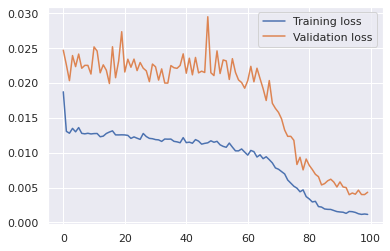

train[-n_future].shape :  (180, 75, 3)


<Figure size 720x432 with 0 Axes>

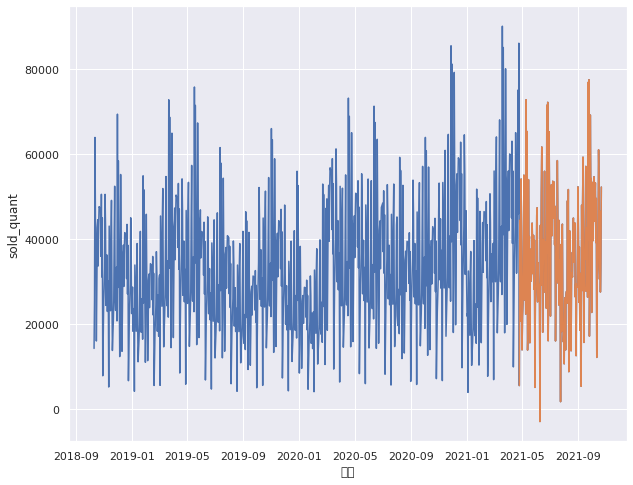

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

org_df = pd.read_csv('/content/drive/MyDrive/5조_스마트팩토리/진유훈/증식완료(orderquant포함).csv',index_col=0)
temp_data = pd.read_pickle('/content/drive/MyDrive/5조_스마트팩토리/진유훈/temp18_21.pkl')
product_list = org_df['prod_name'].value_counts().index

for prod_index in range(2,3):
    #### 데이터 전처리 ####
    org_df = pd.read_csv('/content/drive/MyDrive/5조_스마트팩토리/진유훈/증식완료(orderquant포함).csv',index_col=0)
    org_df = org_df.reset_index(drop=True)
    org_df['일자'] = pd.to_datetime(org_df['일자'])
    org_df = org_df[org_df['일자']>'2018-10-02']


    #상품선택
    prod0_df = org_df[org_df['prod_name']==product_list[prod_index]]
    prod0_df.sort_values('일자')


    ## 진입데이터
    data = pd.merge(prod0_df, temp_data, on='일자')[['일자','sold_quant','기온','습도']]
    data = data.set_index('일자')
    data = data.sort_values('일자')
    
    train_dates = data.index
    


    # scaring
    df_for_training = data
    cols = list(data.columns)

    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scale_cols = ['sold_quant', '기온', '습도']
    df_for_training_scaled = scaler.fit_transform(df_for_training)
    df_for_training_scaled




    n_future = 2 #~일치로 예측할건지(features)
    n_past = int(len(train_dates)*0.1) # 예측에 쓸 데이터 갯수 => 상품 별 데이터 편차가 크므로 임의변수지정
    # if len(train_dates) < 100:
        # n_past = 15
    # if len(train_dates) < 30:
    #     n_past = 7
    if n_past == 0:
        n_past=1
    

    trainX = []
    trainY = []
    for i in range(n_past, len(df_for_training_scaled) - n_future+1):
        trainX.append(df_for_training_scaled[i-n_past:i, 0:df_for_training.shape[1]])
        trainY.append(df_for_training_scaled[i+n_future-1:i+n_future,0])

    trainX,trainY = np.array(trainX), np.array(trainY)
    print('TrainX.shape: ',trainX.shape)
    print('TrainY.shape: ',trainY.shape)
    ######################
    ###### modeling ######
    ######################

    BATCH_SIZE = 16
    time_steps = n_past
    unit = 64

    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU
    from tensorflow.keras.losses import Huber
    # from keras.optimizers import SGD
    from keras.layers import Dropout
        
    # The GRU architecture
    my_GRU_model = Sequential()
    # First GRU layer with Dropout regularisation
    my_GRU_model.add(GRU(units=unit, return_sequences=True, activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    # Second GRU layer
    my_GRU_model.add(GRU(units=unit, return_sequences=True, activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
        
    # Third GRU layer
    my_GRU_model.add(GRU(units=unit, return_sequences=True, activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    # Fourth GRU layer
    my_GRU_model.add(GRU(units=unit, activation='tanh'))
    # my_GRU_model.add(Dropout(0.2))
    # The output layer
    my_GRU_model.add(Dense(units=1))
    # Compiling the RNN
    my_GRU_model.compile(optimizer='adam',loss=Huber(), metrics = ['acc'])
    # Fitting to the training set

    

    print('#'*150)
    print(product_list[prod_index])
    print('#'*150)
    history = my_GRU_model.fit(trainX,trainY,epochs=100,validation_split=0.2, batch_size=BATCH_SIZE,verbose=0)

    my_GRU_model.save(f'/content/drive/MyDrive/5조_스마트팩토리/권준기/진유훈_모델_save/{product_list[prod_index]}.h5',save_format='h5')


    plt.figure()
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label = 'Validation loss')
    plt.legend()
    plt.show()

    # from keras.models import load_model
    # my_GRU_model = load_model(f'/content/drive/MyDrive/5조_스마트팩토리/권준기/진유훈_모델_save/{product_list[0]}.h5')

    
    # freq 조정해서 6개월에 대한 날짜 맞춰야함

    n_future = 180 # 예측기간
    forecast_period_dates = pd.date_range('2021-04-24', periods=n_future, freq='1d').tolist() # 기간동안의 datelist
    print('train[-n_future].shape : ', trainX[-n_future:].shape)
    # 예측값 invers_scaled 
    forecast = my_GRU_model.predict(trainX[-n_future:])
    forecast_copies = np.repeat(forecast, df_for_training.shape[1],axis=-1) # np.repeat(a, n) a를 n개 복사, axis=-1 현재 배열의 마지막 axis
    y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]


    ## predict 반환하는 dataframe 만들어주기
    forecast_dates = []
    for time_i in forecast_period_dates:
        forecast_dates.append(time_i.date())

    len_forecast = len(forecast[:,-1])
    # forecast_dates = pd.date_range(forecast_dates[1], periods=n_future, freq = str(int(n_future/len_forecast))+'d').tolist() # <= 날짜 길이 맞지않는거 대비해  [ 예측요청일(180) / 예측값나온일 ] 해서 frequency로 데이터프레임 날짜 들어가게 띄어주기
    df_forecast = pd.DataFrame({'일자':pd.date_range(forecast_period_dates[1], periods=len_forecast, freq = str(int(n_future/len_forecast))+'d').tolist(), 'sold_quant':y_pred_future})
    df_forecast['일자']=pd.to_datetime(df_forecast['일자'])

    
    ## 결과 시각화

    import seaborn as sns
    import warnings
    warnings.filterwarnings(action='ignore')

    original = prod0_df[['일자','sold_quant']]
    original['일자'] = pd.to_datetime(prod0_df['일자'])
    original = original.loc[original['일자'] >= '2021']
    fig = plt.figure(figsize=(10,6))
    sns.set()
    # sns.lineplot(prod0_df['일자'], prod0_df['sold_quant'])
    # sns.lineplot(df_forecast['일자'], df_forecast['sold_quant'])

    con_data = pd.concat([prod0_df,df_forecast])[['일자','sold_quant']] # 전체기간~예측기간 까지의 데이터
    con_data.reset_index(inplace=True, drop=True) 

    plt.figure(figsize=(10,8))
    sns.lineplot(con_data['일자'][5:], con_data['sold_quant'])
    sns.lineplot(df_forecast['일자'], df_forecast['sold_quant'])
    plt.show()

    # con_data.to_csv(f'/content/drive/MyDrive/5조_스마트팩토리/진유훈/forecast/forecast_{product_list[prod_index]}.csv')

In [ ]:
my_GRU_model.summary()

Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_328 (GRU)               (None, 75, 64)            13248     
                                                                 
 dropout_246 (Dropout)       (None, 75, 64)            0         
                                                                 
 gru_329 (GRU)               (None, 75, 64)            24960     
                                                                 
 dropout_247 (Dropout)       (None, 75, 64)            0         
                                                                 
 gru_330 (GRU)               (None, 75, 64)            24960     
                                                                 
 dropout_248 (Dropout)       (None, 75, 64)            0         
                                                                 
 gru_331 (GRU)               (None, 64)              

In [ ]:
all_df = pd.DataFrame()

for i in range(len(product_list)):
    df = pd.read_csv(f'/content/drive/MyDrive/5조_스마트팩토리/진유훈/forecast/forecast_{product_list[i]}.csv',index_col=0)
    df['prod_name'] = product_list[i]
    all_df = pd.concat([all_df,df])

In [ ]:
all_df.sort_values('일자').to_csv('/content/drive/MyDrive/5조_스마트팩토리/진유훈/forecast/forecast_all.csv')

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# org_df = pd.read_csv('/content/drive/MyDrive/5조_스마트팩토리/진유훈/증식완료(orderquant포함).csv',index_col=0)
# temp_data = pd.read_pickle('/content/drive/MyDrive/5조_스마트팩토리/진유훈/temp18_21.pkl')
# product_list = org_df['prod_name'].unique()

# for prod_index in range(len(product_list)):
#     #### 데이터 전처리 ####
#     org_df = pd.read_csv('/content/drive/MyDrive/5조_스마트팩토리/진유훈/증식완료(orderquant포함).csv',index_col=0)
#     org_df = org_df.reset_index(drop=True)
#     org_df['일자'] = pd.to_datetime(org_df['일자'])
#     org_df = org_df[org_df['일자']>'2018-10-02']
#     #상품선택
#     prod0_df = org_df[org_df['prod_name']==product_list[prod_index]]
#     prod0_df.sort_values('일자')

#     ## 진입데이터
#     data = pd.merge(prod0_df, temp_data, on='일자')[['일자','sold_quant','기온','습도']]
#     data = data.set_index('일자')
#     data = data.sort_values('일자')
    

#     train_dates = data.index
    
#     # scaring
#     df_for_training = data
#     cols = list(data.columns)

#     from sklearn.preprocessing import MinMaxScaler

#     scaler = MinMaxScaler()
#     # 스케일을 적용할 column을 정의합니다.
#     scale_cols = ['sold_quant', '기온', '습도']
#     # 스케일 후 columns
#     df_for_training_scaled = scaler.fit_transform(df_for_training)
#     df_for_training_scaled

#     trainX = []
#     trainY = []

#     n_future = 3 #
#     n_past = 30 # ~일치로 예측할건지(features)
    

#     # if len(train_dates) < 100:
#     #     n_past = 15
#     if len(train_dates) < 50:
#         n_past = 5

#     # print(n_past)
#     for i in range(n_past, len(df_for_training_scaled) - n_future+1):
#         trainX.append(df_for_training_scaled[i-n_past:i, 0:df_for_training.shape[1]])
#         trainY.append(df_for_training_scaled[i+n_future-1:i+n_future,0])

#     trainX,trainY = np.array(trainX), np.array(trainY)

#     ######################
#     ###### modeling ######
#     ######################

#     BATCH_SIZE = 16
#     time_steps = n_past
#     unit = 128

#     from keras.models import Sequential
#     from keras.layers import Dense, SimpleRNN, GRU
#     from tensorflow.keras.losses import Huber
#     # from keras.optimizers import SGD
#     from keras.layers import Dropout
        
#     # The GRU architecture
#     my_GRU_model = Sequential()
#     # First GRU layer with Dropout regularisation
#     my_GRU_model.add(GRU(units=unit, return_sequences=True, activation='tanh'))
#     my_GRU_model.add(Dropout(0.2))
#     # Second GRU layer
#     my_GRU_model.add(GRU(units=unit, return_sequences=True, activation='tanh'))
#     my_GRU_model.add(Dropout(0.2))
        
#     # Third GRU layer
#     my_GRU_model.add(GRU(units=unit, return_sequences=True, activation='tanh'))
#     my_GRU_model.add(Dropout(0.2))
#     # Fourth GRU layer
#     my_GRU_model.add(GRU(units=unit, activation='tanh'))
#     my_GRU_model.add(Dropout(0.2))
#     # The output layer
#     my_GRU_model.add(Dense(units=1))
#     # Compiling the RNN
#     my_GRU_model.compile(optimizer='adam',loss=Huber(), metrics = ['mse'])
#     # Fitting to the training set

#     print('#'*150)
#     print(product_list[prod_index])
#     print('#'*150)
#     history = my_GRU_model.fit(trainX,trainY,epochs=100,validation_split=0.2, batch_size=BATCH_SIZE,verbose=0)
#     my_GRU_model.save(f'/content/drive/MyDrive/5조_스마트팩토리/권준기/진유훈_모델_save/{product_list[prod_index]}.h5')
#     plt.figure()
#     plt.plot(history.history['loss'], label='Training loss')
#     plt.plot(history.history['val_loss'], label = 'Validation loss')
#     plt.legend()
#     plt.show()


    
#     # freq 조정해서 6개월에 대한 날짜 맞춰야함
#     n_future = 180 # 예측기간
#     forecast_period_dates = pd.date_range('2021-04-24', periods=n_future, freq='1d').tolist() # 기간동안의 datelist

#     # 예측값 invers_scaled 
#     forecast = my_GRU_model.predict(trainX[-n_future:])
#     forecast_copies = np.repeat(forecast, df_for_training.shape[1],axis=-1) # np.repeat(a, n) a를 n개 복사, axis=-1 현재 배열의 마지막 axis
#     y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]


#     ## predict 반환하는 dataframe 만들어주기
#     forecast_dates = []
#     for time_i in forecast_period_dates:
#         forecast_dates.append(time_i.date())

#     len_forecast = len(forecast[:,-1])
#     # forecast_dates = pd.date_range(forecast_dates[1], periods=n_future, freq = str(int(n_future/len_forecast))+'d').tolist() # <= 날짜 길이 맞지않는거 대비해  [ 예측요청일(180) / 예측값나온일 ] 해서 frequency로 데이터프레임 날짜 들어가게 띄어주기
#     df_forecast = pd.DataFrame({'일자':pd.date_range(forecast_period_dates[1], periods=len_forecast, freq = str(int(n_future/len_forecast))+'d').tolist(), 'sold_quant':y_pred_future})
#     df_forecast['일자']=pd.to_datetime(df_forecast['일자'])

    
#     ## 결과 시각화

#     import seaborn as sns
#     import warnings
#     warnings.filterwarnings(action='ignore')

#     original = prod0_df[['일자','sold_quant']]
#     original['일자'] = pd.to_datetime(prod0_df['일자'])
#     original = original.loc[original['일자'] >= '2021']
#     fig = plt.figure(figsize=(10,6))
#     sns.set()
#     # sns.lineplot(prod0_df['일자'], prod0_df['sold_quant'])
#     # sns.lineplot(df_forecast['일자'], df_forecast['sold_quant'])

#     con_data = pd.concat([prod0_df,df_forecast])[['일자','sold_quant']] # 전체기간~예측기간 까지의 데이터
#     con_data.reset_index(inplace=True, drop=True) 

#     plt.figure(figsize=(10,8))
#     sns.lineplot(con_data['일자'][5:], con_data['sold_quant'])
#     sns.lineplot(df_forecast['일자'], df_forecast['sold_quant'])
#     plt.show()

#     con_data.to_csv(f'/content/drive/MyDrive/5조_스마트팩토리/진유훈/forecast/forecast_{product_list[prod_index]}.csv')